In [1]:
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools")
from analysisImports import *
setLibParams()

cfgDir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/configs/"
plt.style.use(cfgDir+'plt_settings.mplstyle')

from MatchEles import genMatch_electrons

In [2]:
files = ["files/"+f for f in os.listdir("files")]
for f in files:
    genMatch_electrons(f)

******************************************
Analyzing files/mchi-120_dmchi-40_ct-1.root
------------------------------------------
Electron matched to regular in 185 events (71.43%)
Electron matched to low-pT in 26 events (10.04%)
Electron matched to either in 207 events (79.92%)
---------------------------------------------------------
Positron matched to regular in 186 events (71.81%)
Positron matched to low-pT in 23 events (8.88%)
Positron matched to either in 203 events (78.38%)
---------------------------------------------------------
e = reg, p = reg in 134 events (51.74%)
e = low, p = reg in 19 events (7.34%)
e = reg, p = low in 17 events (6.56%)
e = low, p = low in 3 events (1.16%)
---------------------------------------------------------
e & p both matched to something in 166 events (64.09%)
******************************************
Analyzing files/mchi-120_dmchi-40_ct-10.root
------------------------------------------
Electron matched to regular in 151 events (58.30%)
Electro

In [35]:
regreg = events.EleVertexRegReg
lowreg = events.EleVertexLowReg
lowlow = events.EleVertexLowLow

gen_vtx = ak.zip({"x":genE.x,"y":genE.y,"z":genE.z},with_name="ThreeVector")

rr_vtx = ak.zip({"x":regreg.x,"y":regreg.y,"z":regreg.z},with_name="ThreeVector")
lr_vtx = ak.zip({"x":lowreg.x,"y":lowreg.y,"z":lowreg.z},with_name="ThreeVector")
ll_vtx = ak.zip({"x":lowlow.x,"y":lowlow.y,"z":lowlow.z},with_name="ThreeVector")

# Cleaning
rr_vtx = rr_vtx[rr_vtx.x != -9999]
lr_vtx = lr_vtx[lr_vtx.x != -9999]
ll_vtx = ll_vtx[ll_vtx.x != -9999]

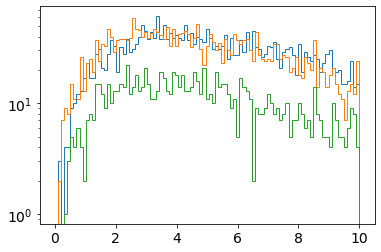

In [62]:
rr_min = ak.fill_none(ak.min((rr_vtx - gen_vtx).rho,axis=1),-1)
lr_min = ak.fill_none(ak.min((lr_vtx - gen_vtx).rho,axis=1),-1)
ll_min = ak.fill_none(ak.min((ll_vtx - gen_vtx).rho,axis=1),-1)
plt.hist(rr_min,bins=np.linspace(0,10,100),histtype="step")
plt.hist(lr_min,bins=np.linspace(0,10,100),histtype="step")
plt.hist(ll_min,bins=np.linspace(0,10,100),histtype="step")
plt.yscale("log")

<Array [8.02, -1, -1, -1, ... 3.58, 2.97, -1] type='16492 * float64'>